In [1]:
# %matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.facecolor'] = (1,1,1,1)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

# import locale
# import matplotlib.dates as mdates
# locale.setlocale(locale.LC_TIME,"Danish")
# # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# # ax1.spines['top'].set_visible(False) 

# import os
# # import csv
# import math

# from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# # Define running mean functions
# def rnMean(data,meanWidth):
#     return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
# def rnTime(t,meanWidth):
#     return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


# Load data from latest OurWorldInData dataset

In [2]:
df_OWID = pd.read_csv('../InternationalData/owid-covid-data_2025.csv')

In [3]:
df_OWIDDK = df_OWID[df_OWID.iso_code == 'DNK'].copy()
df_OWIDDK['date'] = pd.to_datetime(df_OWIDDK.date)
df_OWIDDK = df_OWIDDK.set_index('date')

In [4]:
df_OWIDDK.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vac

(0.0, 44.6985)

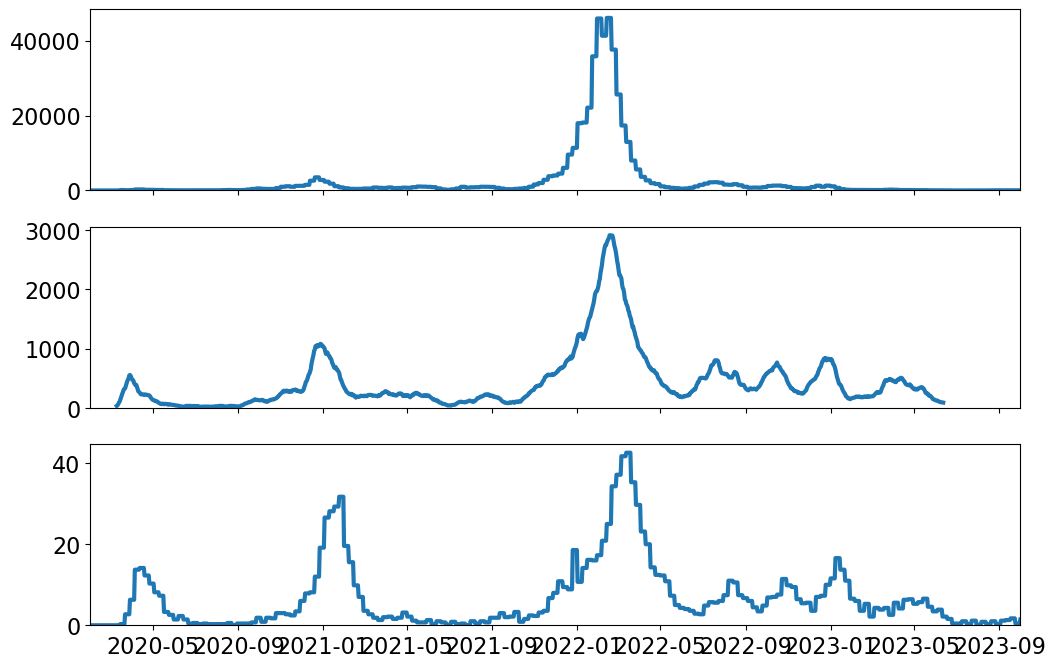

In [36]:
d1 = np.datetime64('2020-02-01')
d2 = np.datetime64('2023-10-01')
# d2 = np.datetime64('2021-10-01')


fig,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True)
ax1.plot(df_OWIDDK.loc[d1:d2].new_cases_smoothed)
ax2.plot(df_OWIDDK.loc[d1:d2].weekly_hosp_admissions)
ax3.plot(df_OWIDDK.loc[d1:d2].new_deaths_smoothed)


ax1.set_xlim([d1,d2])

ax1.set_ylim(0)
ax2.set_ylim(0)
ax3.set_ylim(0)

# Load SSI data 

In [166]:
import os
# Define paths
rootdir_data = os.getcwd() +"/../DanskeData/" 

path_data = rootdir_data + "ssi_data/"
path_dash = rootdir_data + "ssi_dashboard/"
path_vacc = rootdir_data + "ssi_vacc/"

path_figs = os.getcwd() +"/../Figures/" 
# path_figs = path_figs + 'Overblik/'

In [19]:
latestsubdir = list(os.walk(path_data))[0][1][-1]
latestdir = path_data + latestsubdir

dfCase = pd.read_csv(latestdir+'/Test_pos_over_time.csv',delimiter = ';',dtype=str)
dfCase = dfCase.iloc[:-2]
dfCase['NewPositive'] = pd.to_numeric(dfCase['NewPositive'].astype(str).apply(lambda x: x.replace('.','')))
dfCase['Tested'] = pd.to_numeric(dfCase['Tested'].astype(str).apply(lambda x: x.replace('.','')))
dfCase['PosPct'] = pd.to_numeric(dfCase['PosPct'].astype(str).apply(lambda x: x.replace(',','.')))
dfCase['Date'] =  pd.to_datetime(dfCase.Date,format='%Y-%m-%d')
testDates = dfCase['Date']

dfAdm = pd.read_csv(latestdir+'/Newly_admitted_over_time.csv',delimiter = ';',dtype=str)
dfAdm['Dato'] = pd.to_datetime(dfAdm['Dato'])
dfAdm['Total'] = pd.to_numeric(dfAdm['Total'])
dfAdm.tail()


dfDea = pd.read_csv(latestdir+'/Deaths_over_time.csv',delimiter = ';',dtype=str)
dfDea = dfDea.iloc[:-1,:]
dfDea['Dato'] = pd.to_datetime(dfDea['Dato'])
dfDea['Antal_døde'] = pd.to_numeric(dfDea['Antal_døde'])
dfDea.tail()

dfCase.tail()

,Date,NewPositive,NotPrevPos,PosPct,PrevPos,Tested,Tested_kumulativ
1154,2023-03-26,137,854,16.0,17,871,66.181.778
1155,2023-03-27,276,1.570,17.6,21,1591,66.183.369
1156,2023-03-28,218,1.287,16.9,27,1314,66.184.683
1157,2023-03-29,201,1.278,15.7,18,1296,66.185.979
1158,2023-03-30,159,1.145,13.9,25,1170,66.187.149


In [20]:
dfCase = dfCase.set_index('Date')
dfAdm = dfAdm.set_index('Dato')
dfDea = dfDea.set_index('Dato')

In [73]:
# Load data from "noegletal"
# Until 2021-12-20, all dates were included in one file. Since then, additional data was added, and the file only contains the most recent numbers

latestsubdirs_dash = list(os.walk(path_dash))[0][1]
# latestsubdirs_dash == 'SSI_dashboard_2021-12-17'
lastFullFileIndex = np.where([x == 'SSI_dashboard_2021-12-17' for x in latestsubdirs_dash])[0][0]
latestdir_dash = path_dash + latestsubdirs_dash[lastFullFileIndex]

dfKey = pd.read_csv(latestdir_dash+'\\Kommunalt_DB\\01_noegletal.csv',encoding='latin1',delimiter=';')

dfKeysArray = []
for k in range(lastFullFileIndex+1,len(latestsubdirs_dash)):
    
    latestdir_dash = path_dash + latestsubdirs_dash[k]
    # print(latestdir_dash[-5:-3])
    curYear = int(latestdir_dash[-10:-6])
    curMonth = int(latestdir_dash[-5:-3])
    
    # if (curYear >= 2023) and (curMonth >= 3):
    #     2+2 
    # else:
    if (curYear <= 2022):
        curdf = pd.read_csv(latestdir_dash+'\\Kommunalt_DB\\01_noegletal.csv',encoding='latin1',delimiter=';')
        dfKeysArray.append(curdf)
    

dfKey['IndberetningDato'] = pd.to_datetime(dfKey['IndberetningDato'])

# print(dfKey.columns)
# dfKey.tail()

In [74]:
# len(dfKeysArray)
# dfKeysArray[k]

In [79]:
# Make arrays to plot
keyDates = dfKey.IndberetningDato
keyDatesShift = keyDates + np.timedelta64(365,'D')
keyCase = dfKey['Antal nye bekræftede tilfælde']
keyNewAdm = dfKey['Antal nye indlæggelser']
keyAdm = dfKey['Antal indlagte i dag med COVID']
keyAdmInt = dfKey['Antal indlagt i dag på intensiv']
keyAdmResp = dfKey['Antal indlagt i dag og i respirator']
keyDeath = dfKey['Antal nye døde']
keyTest = dfKey['Antal prøver siden sidst']

## Add the new data

# 2021-12-20 still used old names
dateToAdd = np.datetime64(pd.to_datetime(dfKeysArray[0].IndberetningDato.values[0]))
keyDates = np.append(keyDates,dateToAdd)
keyCase = np.append(keyCase,dfKeysArray[0]['Antal nye bekræftede tilfælde'][0])
keyNewAdm = np.append(keyNewAdm,dfKeysArray[0]['Antal nye indlæggelser'][0])
keyAdm = np.append(keyAdm,dfKeysArray[0]['Antal indlagte i dag med COVID'][0])
keyAdmInt = np.append(keyAdmInt,dfKeysArray[0]['Antal indlagt i dag på intensiv'][0])
keyAdmResp = np.append(keyAdmResp,dfKeysArray[0]['Antal indlagt i dag og i respirator'][0])
keyDeath = np.append(keyDeath,dfKeysArray[0]['Antal nye døde'][0])
keyTest = np.append(keyTest,dfKeysArray[0]['Antal prøver siden sidst'][0])

# Make an array for missing reinfection data
keyCaseReInf = keyCase * np.nan 

# After which the new names are used
for k in range(1,len(dfKeysArray)):
    thisDate = dfKeysArray[k].Dato[0]
    # thisCase = dfKeysArray[k]['Bekræftede tilfælde siden sidste opdatering'][0]
    thisCase = dfKeysArray[k]['Bekræftede tilfælde i alt siden sidste opdatering'][0]
    thisNewAdm = dfKeysArray[k]['Nyindlæggelser siden sidste opdatering'][0]
    thisDeath = dfKeysArray[k]['Dødsfald siden sidste opdatering'][0]
    thisAdm = dfKeysArray[k]['Indlæggelser i dag'][0]
    thisAdmInt = dfKeysArray[k]['Indlæggelser i dag (intensiv)'][0]
    thisAdmResp = dfKeysArray[k]['Indlæggelser i dag (respirator)'][0]
    thisTest = dfKeysArray[k]['PRC-tests siden sidste opdatering'][0]
    # # print(dfKeysArray[k])
    # print(thisDate)
    # print(thisAdm)
    # print(thisAdmInt)
    
    thisCaseReInf = dfKeysArray[k]['Reinfektioner siden sidste opdatering'][0]

    keyDates = np.append(keyDates,np.datetime64(thisDate))
    keyCase = np.append(keyCase,thisCase)
    keyNewAdm = np.append(keyNewAdm,thisNewAdm)
    keyAdm = np.append(keyAdm,thisAdm)
    keyAdmInt = np.append(keyAdmInt,thisAdmInt)
    keyAdmResp = np.append(keyAdmResp,thisAdmResp)
    keyDeath = np.append(keyDeath,thisDeath)
    keyTest = np.append(keyTest,thisTest)

    keyCaseReInf = np.append(keyCaseReInf,thisCaseReInf)


keyDates = keyDates.astype('datetime64[D]')
keyDatesShift = keyDates + np.timedelta64(365,'D')

# Collect everything in a single dataframe
dfKeyFull = pd.DataFrame()
dfKeyFull['Date'] = keyDates
dfKeyFull['Cases_New'] = keyCase
dfKeyFull['Cases_Reinfection'] = keyCaseReInf
dfKeyFull['New_Admissions'] = keyNewAdm
dfKeyFull['Hospitalizations'] = keyAdm
dfKeyFull['ICU'] = keyAdmInt
dfKeyFull['Respirator'] = keyAdmResp
dfKeyFull['Deaths'] = keyDeath
dfKeyFull['Tests'] = keyTest


dfKeyFull = dfKeyFull.set_index('Date')

# Plots

In [80]:
print(dfCase.columns)
print(dfAdm.columns)
print(dfDea.columns)

Index(['NewPositive', 'NotPrevPos', 'PosPct', 'PrevPos', 'Tested',
       'Tested_kumulativ'],
      dtype='object')
Index(['Hovedstaden', 'Sjælland', 'Syddanmark', 'Midtjylland', 'Nordjylland',
       'Ukendt Region', 'Total'],
      dtype='object')
Index(['Antal_døde'], dtype='object')


(0.0, 40.95)

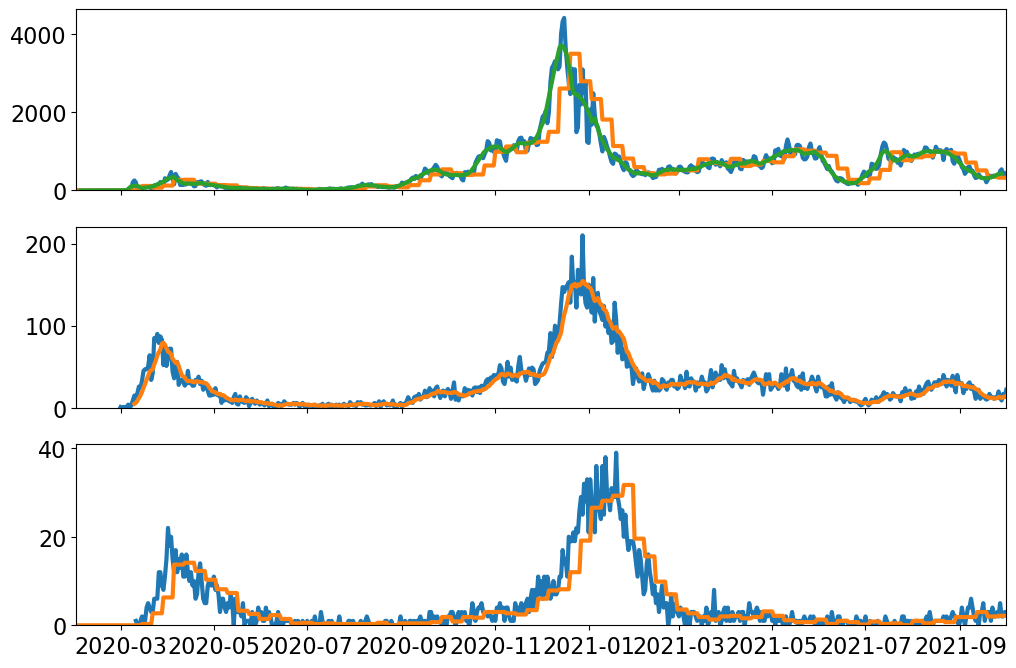

In [81]:
d1 = np.datetime64('2020-02-01')
d2 = np.datetime64('2021-10-01')


fig,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True)
ax1.plot(dfCase.loc[d1:d2].NewPositive)
ax2.plot(dfAdm.loc[d1:d2].Total)
ax3.plot(dfDea.loc[d1:d2].Antal_døde)


ax1.plot(df_OWIDDK.loc[d1:d2].new_cases_smoothed)
ax2.plot(df_OWIDDK.loc[d1:d2].weekly_hosp_admissions/7)
ax3.plot(df_OWIDDK.loc[d1:d2].new_deaths_smoothed)

ax1.plot(dfCase.loc[d1:d2].NewPositive.rolling(window=7,center=True).mean())

ax1.set_xlim([d1,d2])

ax1.set_ylim(0)
ax2.set_ylim(0)
ax3.set_ylim(0)

Index(['Cases_New', 'Cases_Reinfection', 'New_Admissions', 'Hospitalizations',
       'ICU', 'Respirator', 'Deaths', 'Tests'],
      dtype='object')

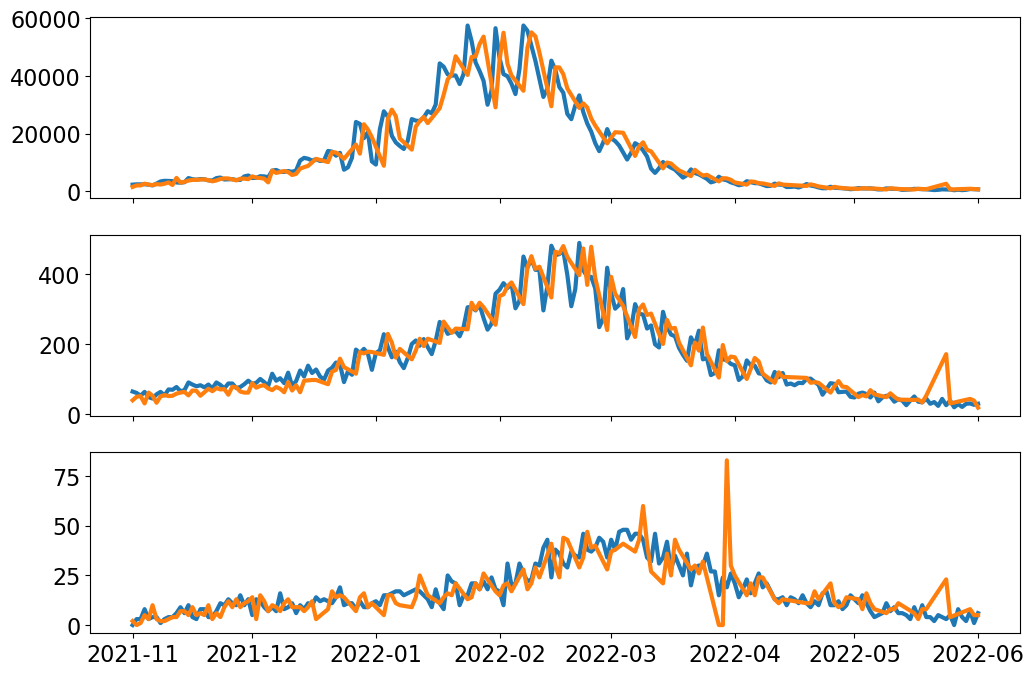

In [92]:
d1 = np.datetime64('2020-02-01')
d2 = np.datetime64('2022-10-01')
d1 = np.datetime64('2021-11-01')
d2 = np.datetime64('2022-06-01')


fig,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True)
ax1.plot(dfCase.loc[d1:d2].NewPositive)
ax2.plot(dfAdm.loc[d1:d2].Total)
ax3.plot(dfDea.loc[d1:d2].Antal_døde)

ax1.plot(dfKeyFull.loc[d1:d2].Cases_New)
ax2.plot(dfKeyFull.loc[d1:d2].New_Admissions)
ax3.plot(dfKeyFull.loc[d1:d2].Deaths)
dfKeyFull.columns

# Konklusion: Brug de "almindelige" filer

In [98]:
# df_OWIDDK.columns
# df_OWIDDK.population.unique()
DKpop = 5882259 # Fra OurWorldInData's tal

In [122]:
df = dfCase.copy()
df['Hosp'] = dfAdm.Total
df['Deaths'] = dfDea.Antal_døde

df['Hosp'] = df['Hosp'].fillna(0)
df['Deaths'] = df['Deaths'].fillna(0)

df = df[['NewPositive','Hosp','Deaths']].copy()

In [124]:
# df.dtypes


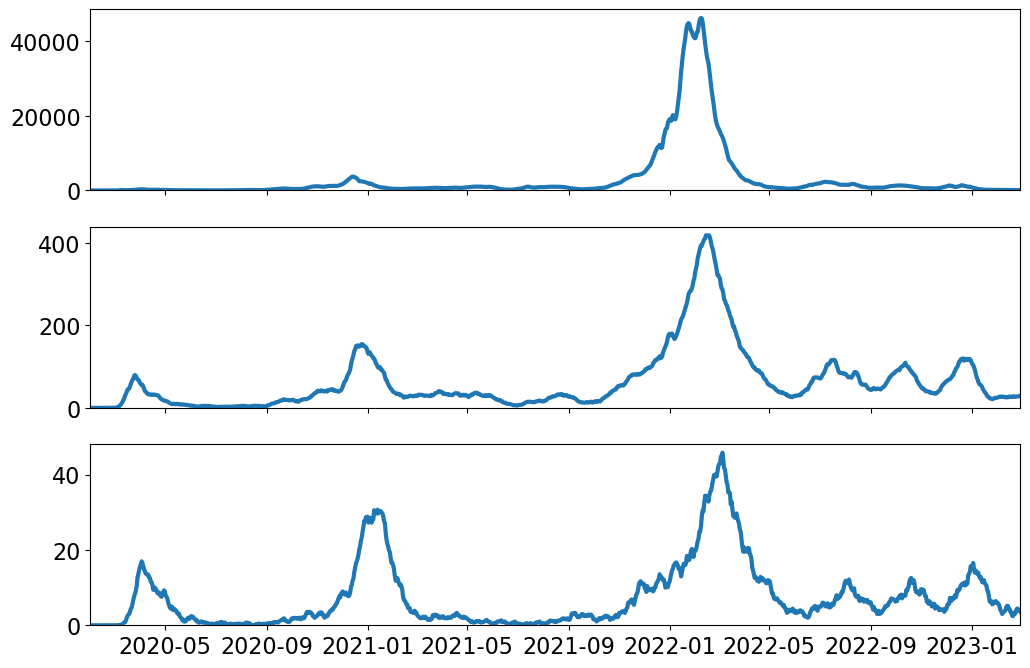

In [128]:
d1 = np.datetime64('2020-02-01')
d2 = np.datetime64('2023-03-01')

curdf = df.loc[d1:d2]
curdfRoll = df.rolling(window=7,min_periods=1,center=True).mean().loc[d1:d2]

fig,axs = plt.subplots(3,1,sharex=True)
(ax1,ax2,ax3) = axs.flatten()
ax1.plot(curdfRoll.NewPositive)
ax2.plot(curdfRoll.Hosp)
ax3.plot(curdfRoll.Deaths)

ax1.set_xlim(d1,d2)

for ax in axs.flatten():
    ax.set_ylim(0)

In [151]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

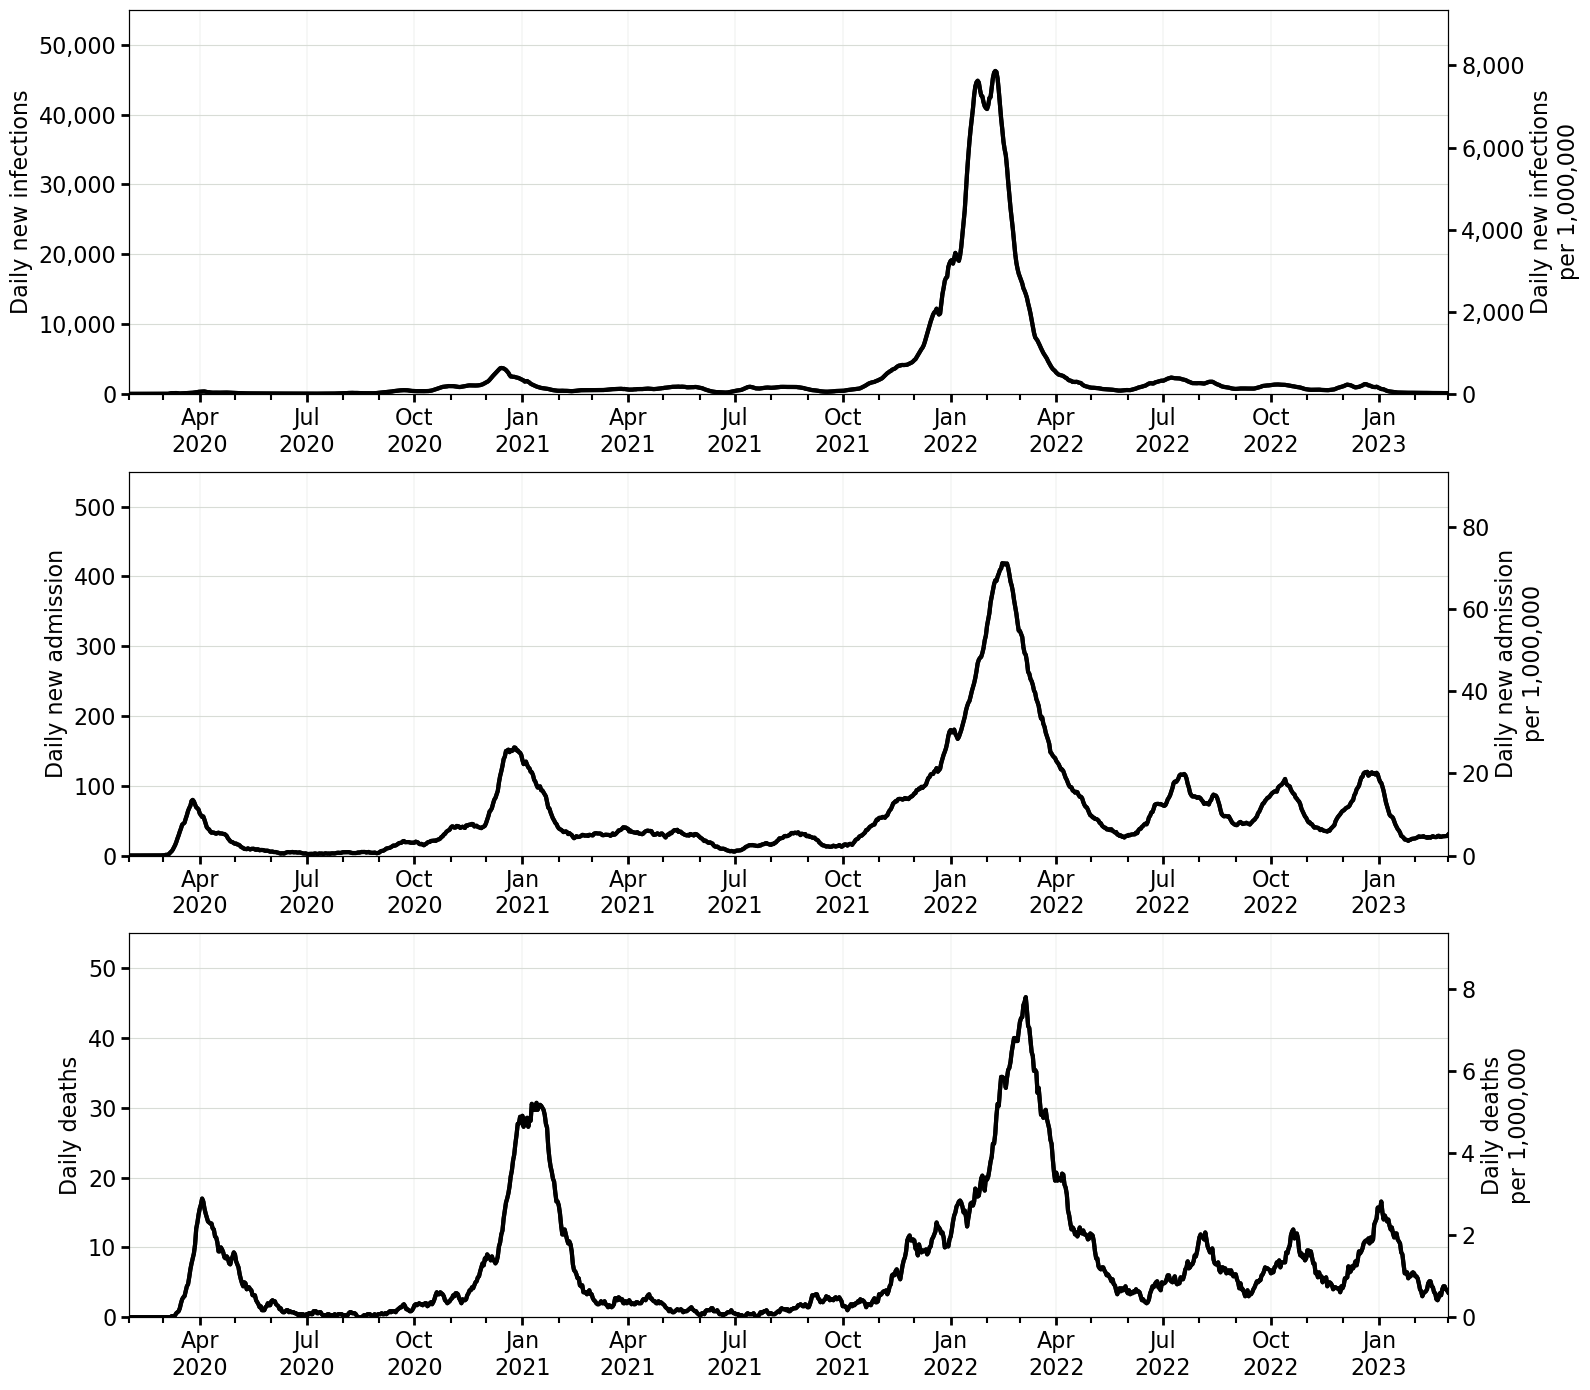

In [206]:
d1 = np.datetime64('2020-02-01')
d2 = np.datetime64('2023-03-01')

curdf = df.loc[d1:d2]
curdfRoll = df.rolling(window=7,min_periods=1,center=True).mean().loc[d1:d2]

fig,axs = plt.subplots(3,1,sharex=True,figsize=(16,14))
(ax1,ax2,ax3) = axs.flatten()


ax1_2 = ax1.twinx()
ax2_2 = ax2.twinx() 
ax3_2 = ax3.twinx() 

ax1.plot(curdfRoll.NewPositive,color='k')
ax2.plot(curdfRoll.Hosp,color='k')
ax3.plot(curdfRoll.Deaths,color='k')

popScale = 100_000 
popScale = 1_000_000 
ax1_2.plot(popScale * curdfRoll.NewPositive/ DKpop ,color='k')
ax2_2.plot(popScale * curdfRoll.Hosp/ DKpop ,color='k')
ax3_2.plot(popScale * curdfRoll.Deaths/ DKpop ,color='k')

ax1.set_xlim(d1,d2)


curFormatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
ax1.get_yaxis().set_major_formatter(curFormatter)
ax1_2.get_yaxis().set_major_formatter(curFormatter)

for ax in axs.flatten():
    ax.set_ylim(0) 
    ax.xaxis.set_tick_params(labelbottom=True)

    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
    
    ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
# ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
    ax.tick_params(length=6, width=2)
    ax.tick_params(length=4, width=1.5,which='minor')

    
    ax.grid(True,color='xkcd:light gray',axis='y')
    ax.grid(True,color='xkcd:light gray',axis='x',lw=0.3)

    # ax.spines['top'].set_visible(False)

for ax in (ax1_2,ax2_2,ax3_2):
    ax.set_ylim(0)
    ax.tick_params(length=6, width=2)
    # ax.spines['top'].set_visible(False)
# ax1_2.set_ylim(0)
# ax2_2.set_ylim(0)
# ax3_2.set_ylim(0)

# Manual ylims
ax1.set_ylim(top=55000)
ax1_2.set_ylim(top=55000 *popScale/DKpop)

ax2.set_ylim(top=550)
ax2_2.set_ylim(top=550 *popScale/DKpop)


ax3.set_ylim(top=55)
ax3_2.set_ylim(top=55 *popScale/DKpop)


ax1.set_ylabel('Daily new infections')
ax1_2.set_ylabel(f'Daily new infections\nper {popScale:,.0f}')

ax2.set_ylabel('Daily new admission')
ax2_2.set_ylabel(f'Daily new admission\nper {popScale:,.0f}')

ax3.set_ylabel('Daily deaths')
ax3_2.set_ylabel(f'Daily deaths\nper {popScale:,.0f}')

fig.tight_layout()

if saveFigures:
    fig.savefig(path_figs+'Overview2025.png')


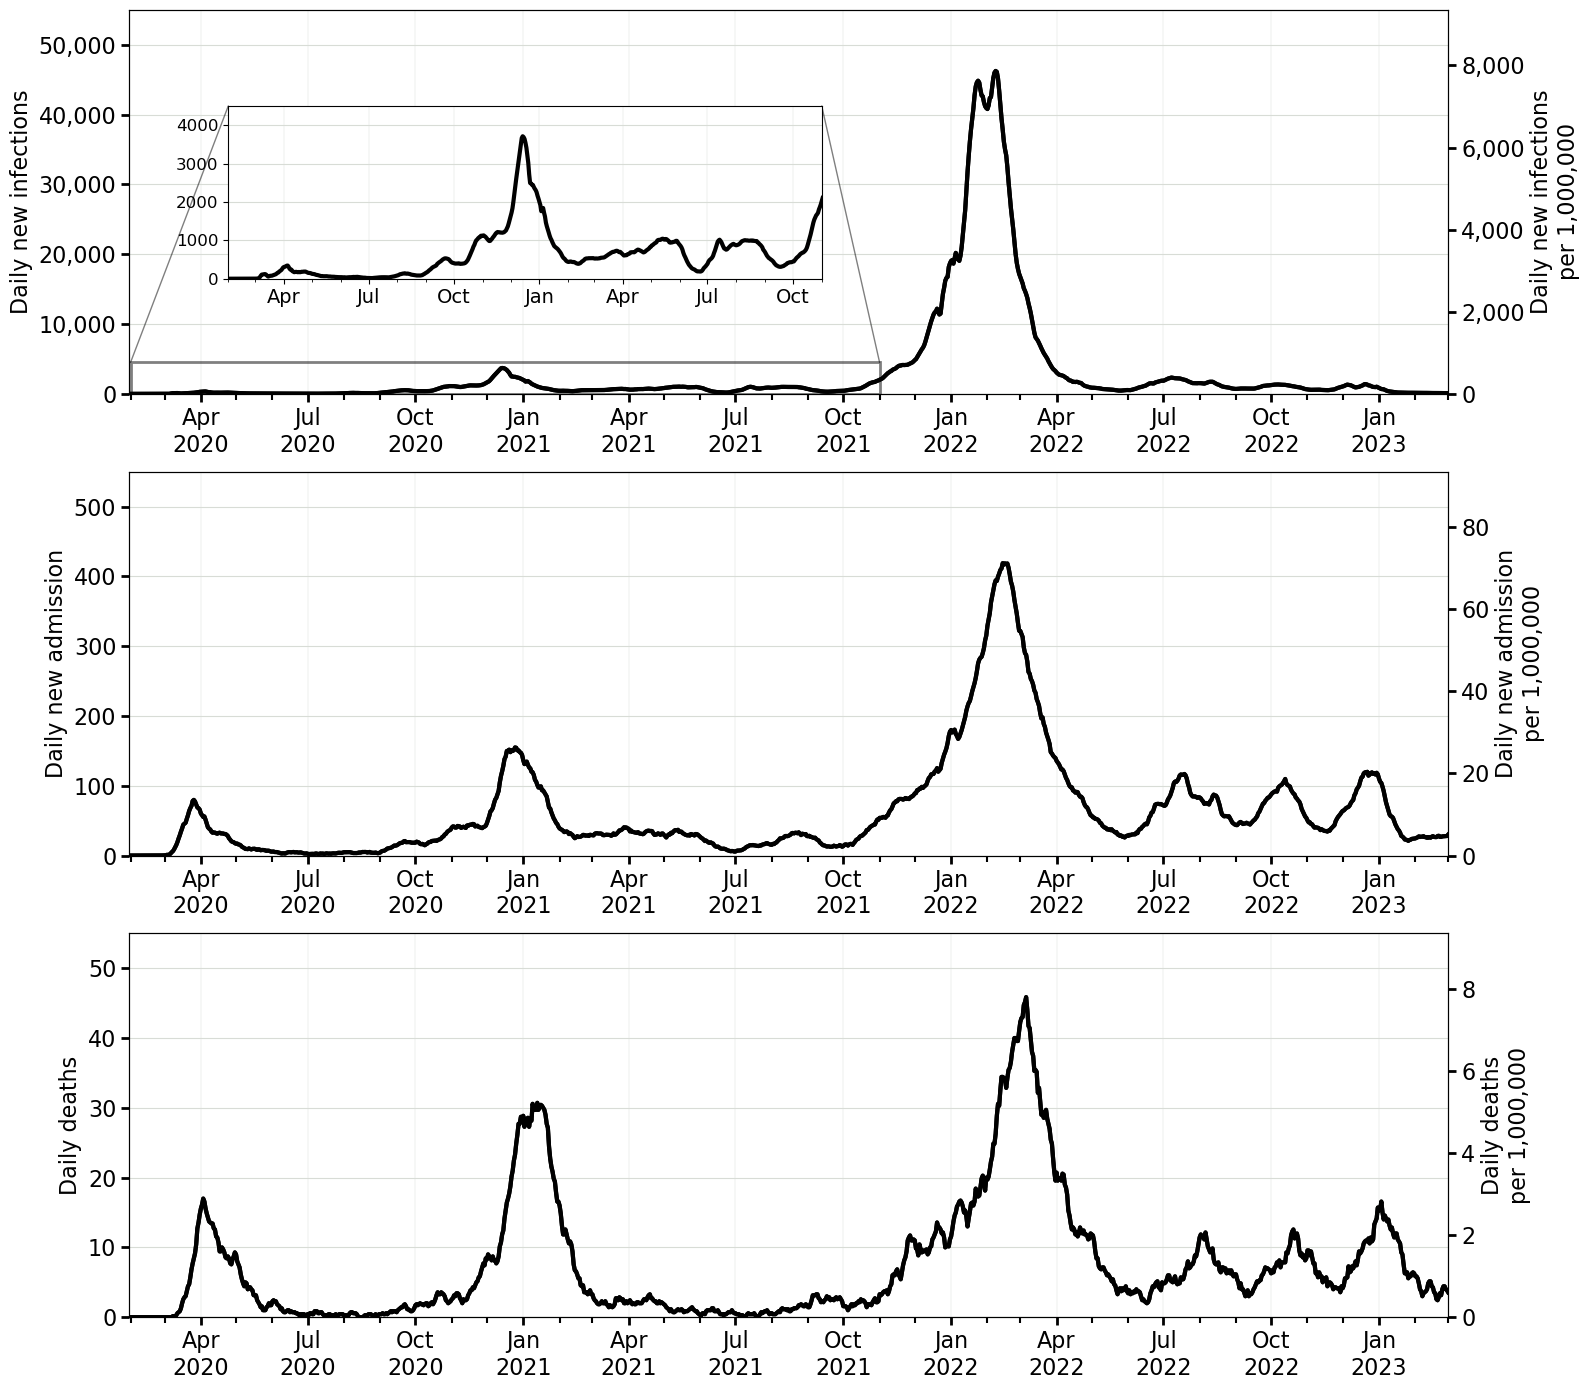

In [259]:
d1 = np.datetime64('2020-02-01')
d2 = np.datetime64('2023-03-01')

curdf = df.loc[d1:d2]
curdfRoll = df.rolling(window=7,min_periods=1,center=True).mean().loc[d1:d2]

fig,axs = plt.subplots(3,1,sharex=True,figsize=(16,14))
(ax1,ax2,ax3) = axs.flatten()


ax1_2 = ax1.twinx()
ax2_2 = ax2.twinx() 
ax3_2 = ax3.twinx() 



ax1.plot(curdfRoll.NewPositive,color='k')
ax2.plot(curdfRoll.Hosp,color='k')
ax3.plot(curdfRoll.Deaths,color='k')

popScale = 100_000 
popScale = 1_000_000 
ax1_2.plot(popScale * curdfRoll.NewPositive/ DKpop ,color='k')
ax2_2.plot(popScale * curdfRoll.Hosp/ DKpop ,color='k')
ax3_2.plot(popScale * curdfRoll.Deaths/ DKpop ,color='k')

ax1.set_xlim(d1-np.timedelta64(1,'D'),d2)


curFormatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
ax1.get_yaxis().set_major_formatter(curFormatter)
ax1_2.get_yaxis().set_major_formatter(curFormatter)

for ax in axs.flatten():
    ax.set_ylim(0) 
    ax.xaxis.set_tick_params(labelbottom=True)
    
    ax.grid(True,color='xkcd:light gray',axis='y')
    ax.grid(True,color='xkcd:light gray',axis='x',lw=0.3)

    # ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,4,7,10]))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
    
    ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))

    ax.tick_params(length=6, width=2)
    ax.tick_params(length=4, width=1.5,which='minor')
# ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

    # ax.spines['top'].set_visible(False)

for ax in (ax1_2,ax2_2,ax3_2):
    ax.set_ylim(0)

    ax.tick_params(length=6, width=2)
    # ax.spines['top'].set_visible(False)
# ax1_2.set_ylim(0)
# ax2_2.set_ylim(0)
# ax3_2.set_ylim(0)

# Manual ylims
ax1.set_ylim(top=55000)
ax1_2.set_ylim(top=55000 *popScale/DKpop)

ax2.set_ylim(top=550)
ax2_2.set_ylim(top=550 *popScale/DKpop)


ax3.set_ylim(top=55)
ax3_2.set_ylim(top=55 *popScale/DKpop)


ax1.set_ylabel('Daily new infections')
ax1_2.set_ylabel(f'Daily new infections\nper {popScale:,.0f}')

ax2.set_ylabel('Daily new admission')
ax2_2.set_ylabel(f'Daily new admission\nper {popScale:,.0f}')

ax3.set_ylabel('Daily deaths')
ax3_2.set_ylabel(f'Daily deaths\nper {popScale:,.0f}')


##### INSET 
axins = ax1.inset_axes([0.075, 0.3, 0.45, 0.45])

axins.plot(curdfRoll.NewPositive,color='k')
axins.set_ylim(0)
axins.set_ylim(top=4500)
d2ins = np.datetime64('2021-11-01')
axins.set_xlim([d1,d2ins])

# axins.set_yticks([0,2000,4000])
axins.grid(True,color='xkcd:light gray',axis='y')
axins.grid(True,color='xkcd:light gray',axis='x',lw=0.3)

ax1.indicate_inset_zoom(axins, edgecolor="black",linewidth=2)

# axins.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axins.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,4,7,10]))
axins.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

axins.tick_params(axis='both', which='major', labelsize=12)
axins.tick_params(axis='x', which='major', labelsize=14)

axins.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
#####

fig.tight_layout()

if saveFigures:
    fig.savefig(path_figs+'Overview2025_WithCaseInset.png')


# ICU OWID figur

In [221]:
df_OWIDSE = df_OWID[df_OWID.iso_code == 'SWE'].copy()
df_OWIDSE['date'] = pd.to_datetime(df_OWIDSE.date)
df_OWIDSE = df_OWIDSE.set_index('date')

df_OWIDSE['icu_patients_per_million'] = df_OWIDSE.icu_patients_per_million.fillna(0)

In [222]:
df_OWIDDK['icu_patients_per_million'] = df_OWIDDK.icu_patients_per_million.fillna(0)

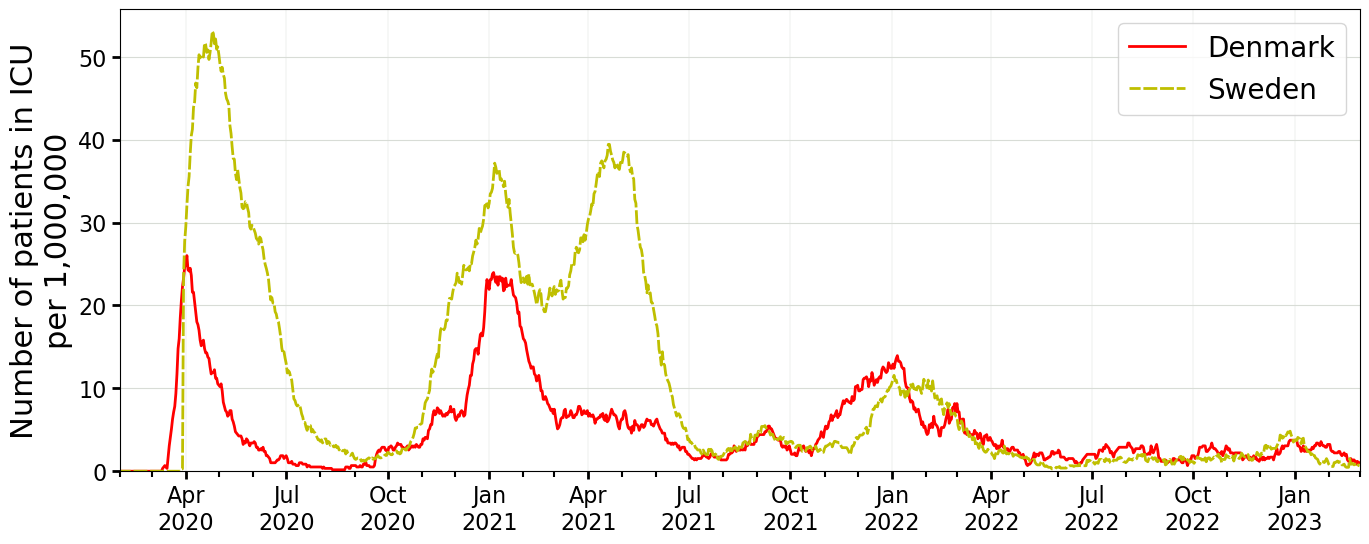

In [280]:
d1 = np.datetime64('2020-02-01')
d2 = np.datetime64('2023-03-01')

fig,ax = plt.subplots(figsize=(16,6))
ax.plot(df_OWIDDK.loc[d1:d2].icu_patients_per_million,color='r',label='Denmark',lw=2)
ax.plot(df_OWIDSE.loc[d1:d2].icu_patients_per_million,color='y',label='Sweden',ls=(1,(5,1)),lw=2)


ax.grid(True,color='xkcd:light gray',axis='y')
ax.grid(True,color='xkcd:light gray',axis='x',lw=0.3)

# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,4,7,10]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))

ax.set_ylabel('Number of patients in ICU\nper 1,000,000',fontsize=22)


ax.tick_params(length=6, width=2)
ax.tick_params(length=4, width=1.5,which='minor')

ax.set_xlim(d1,d2)

ax.legend(fontsize=20)

ax.set_ylim(0)


if saveFigures:
    fig.savefig(path_figs+'ICU2025.png')


# Cumulative confirmed covid OWID

In [328]:

# def getColormapFromList(nameList,N=None):
#     if N == None:
#         N = len(nameList)
#     cmap = colors.LinearSegmentedColormap.from_list("", nameList,N=N)
#     return cmap

# getColormapFromList('tab20',10)

# import matplotlib.cm as cm 

# curcmap = cm.get_cmap('Spectral')


0.8

In [341]:
# countriesToShow = []

df_OWID[df_OWID.continent == 'Europe'].location.unique()

countriesToShow = [
    'Denmark',
    'Sweden',
    'Norway',
    'Finland',
    'France',
    'Italy',
    'Germany',
    'Belgium',
    'United Kingdom',
    'Bulgaria',
    'Hungary',
]

countryColor = {
    'Denmark': 'r',
    'Sweden': 'y',
    'Norway': 'xkcd:dark blue',
    'Finland': 'xkcd:light blue',
    'France': 'xkcd:dark red',
    'Italy': 'xkcd:light green',
    'Germany': 'xkcd:light yellow',
    'Belgium': 'k',
    'United Kingdom': 'xkcd:light red',
    'Bulgaria': 'xkcd:dark green',
    'Hungary': 'm',
}


import matplotlib

curcmap = matplotlib.colormaps['nipy_spectral']
# curcmap.normalize(3,2)
norm = matplotlib.colors.Normalize(0,len(countriesToShow))


curColors = [curcmap(norm(x)) for x in range(len(countriesToShow))]



# df_OWID.columns 

In [342]:

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)

df_Period = df_OWID.copy()
df_Period['date'] = pd.to_datetime(df_Period.date)
df_Period = df_Period.set_index('date')


d1 = np.datetime64('2020-02-01')
d2 = np.datetime64('2023-03-01')


In [ ]:
# curdf.excess_mortality_cumulative_per_million.ffill()

In [374]:
dfOrder = pd.DataFrame(columns=['Country','Count','Excess'])
for curLoc in countriesToShow:
    
    curdf = df_Period[df_Period.location == curLoc]
    curdf = curdf.loc[d1:d2]

    curVal = curdf.total_deaths_per_million.iloc[-1]
    # dfOrder = dfOrder.append({'Country':curLoc,'Count':curVal})
    # dfOrder.loc[len(dfOrder)] = [curLoc,curVal]

    curExc = curdf.excess_mortality_cumulative_per_million.ffill().iloc[-1]

    dfOrder.loc[len(dfOrder)] = [curLoc,curVal,curExc]
    
# curdf.total_deaths_per_million.iloc[-1]
dfOrder = dfOrder.sort_values('Count')
countriesToShowOrdered = dfOrder.Country.values[::-1]
print(countriesToShowOrdered)
dfOrder

['Bulgaria' 'Hungary' 'United Kingdom' 'Italy' 'Belgium' 'France' 'Sweden'
 'Germany' 'Finland' 'Denmark' 'Norway']


,Country,Count,Excess
2,Norway,959.90,1205.36
0,Denmark,1397.11,732.00
3,Finland,1623.54,1985.19
6,Germany,2030.32,2346.95
1,Sweden,2260.63,1473.41
4,France,2571.06,1847.38
7,Belgium,2895.86,2379.53
5,Italy,3156.27,4108.69
8,United Kingdom,3245.47,2926.19
10,Hungary,5025.66,3950.00


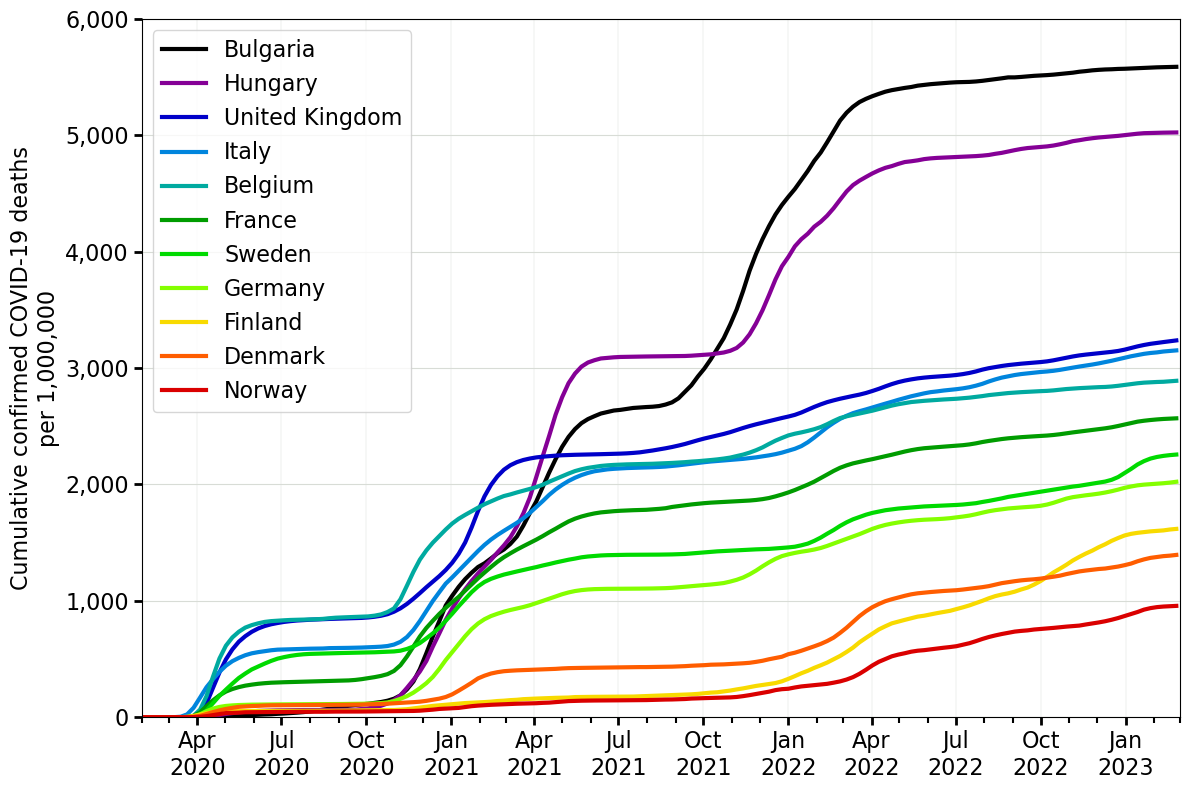

In [375]:
fig,ax = plt.subplots()

df_Period = df_OWID.copy()
df_Period['date'] = pd.to_datetime(df_Period.date)
df_Period = df_Period.set_index('date')
# df_Period = df_Period.loc[d1:d2].copy()

# for curLoc in countriesToShow:
for i,curLoc in enumerate(countriesToShowOrdered):
    curdf = df_Period[df_Period.location == curLoc]
    curdf = curdf.loc[d1:d2]

    curColor = curColors[i]
    # ax.plot(curdf.new_deaths_smoothed,label=curLoc,color=countryColor[curLoc])
    ax.plot(curdf.total_deaths_per_million.iloc[::7],label=curLoc,color=curColor)
    # ax.plot(curdf.total_deaths_per_million.rolling(window=7,center=True).mean(),label=curLoc)

ax.legend()


ax.set_ylim(0) 
ax.xaxis.set_tick_params(labelbottom=True)

ax.grid(True,color='xkcd:light gray',axis='y')
ax.grid(True,color='xkcd:light gray',axis='x',lw=0.3)

# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,4,7,10]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))

ax.tick_params(length=6, width=2)
ax.tick_params(length=4, width=1.5,which='minor')

ax.set_xlim(d1,d2)

ax.set_ylim(top=6000)

ax.set_ylabel('Cumulative confirmed COVID-19 deaths\nper 1,000,000')


curFormatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
ax.get_yaxis().set_major_formatter(curFormatter)

fig.tight_layout()

if saveFigures:
    fig.savefig(path_figs+'CumulativeDeaths2025.png')


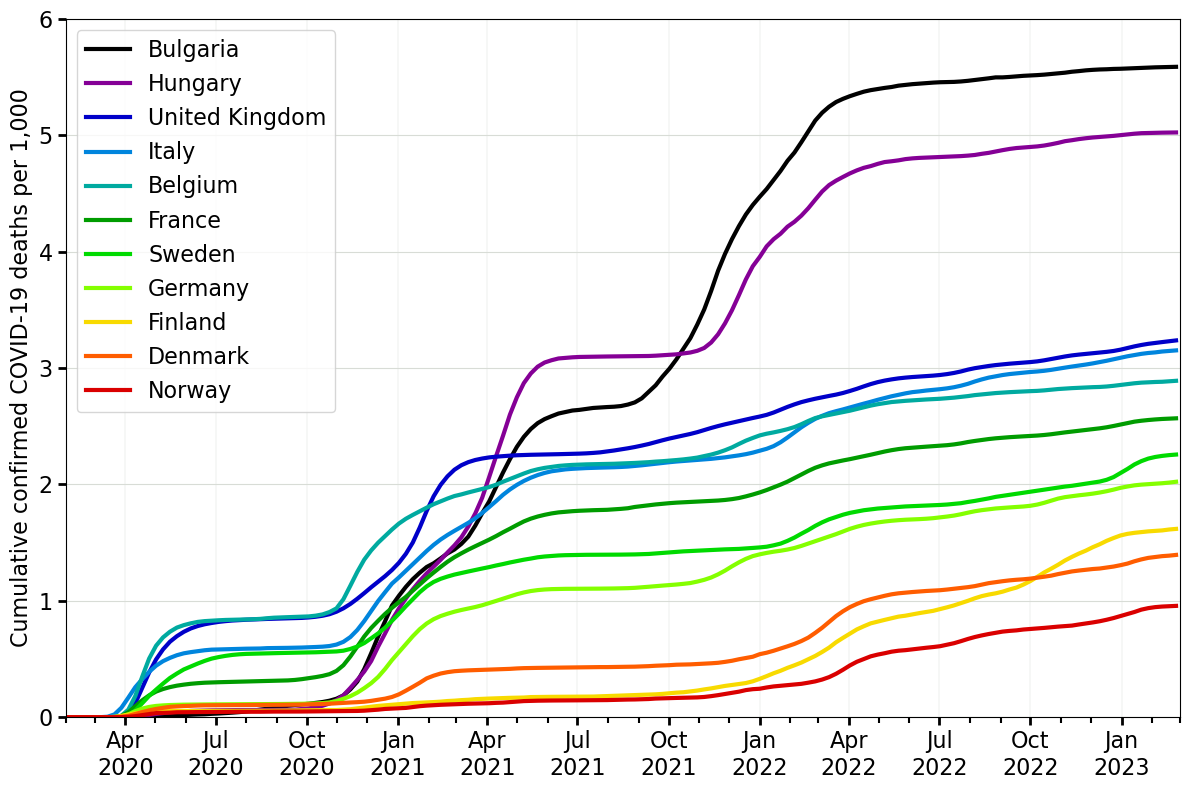

In [376]:
fig,ax = plt.subplots()

df_Period = df_OWID.copy()
df_Period['date'] = pd.to_datetime(df_Period.date)
df_Period = df_Period.set_index('date')
# df_Period = df_Period.loc[d1:d2].copy()

# for curLoc in countriesToShow:
for i,curLoc in enumerate(countriesToShowOrdered):
    curdf = df_Period[df_Period.location == curLoc]
    curdf = curdf.loc[d1:d2]

    curColor = curColors[i]
    # ax.plot(curdf.new_deaths_smoothed,label=curLoc,color=countryColor[curLoc])
    ax.plot(curdf.total_deaths_per_million.iloc[::7]/1000,label=curLoc,color=curColor)
    # ax.plot(curdf.total_deaths_per_million.rolling(window=7,center=True).mean(),label=curLoc)

ax.legend()


ax.set_ylim(0) 
ax.xaxis.set_tick_params(labelbottom=True)

ax.grid(True,color='xkcd:light gray',axis='y')
ax.grid(True,color='xkcd:light gray',axis='x',lw=0.3)

# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,4,7,10]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))

ax.tick_params(length=6, width=2)
ax.tick_params(length=4, width=1.5,which='minor')

ax.set_xlim(d1,d2)

ax.set_ylim(top=6)

ax.set_ylabel('Cumulative confirmed COVID-19 deaths per 1,000')


curFormatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
ax.get_yaxis().set_major_formatter(curFormatter)

fig.tight_layout()

if saveFigures:
    fig.savefig(path_figs+'CumulativeDeaths2025_Thousands.png')


In [390]:
# dfOrder

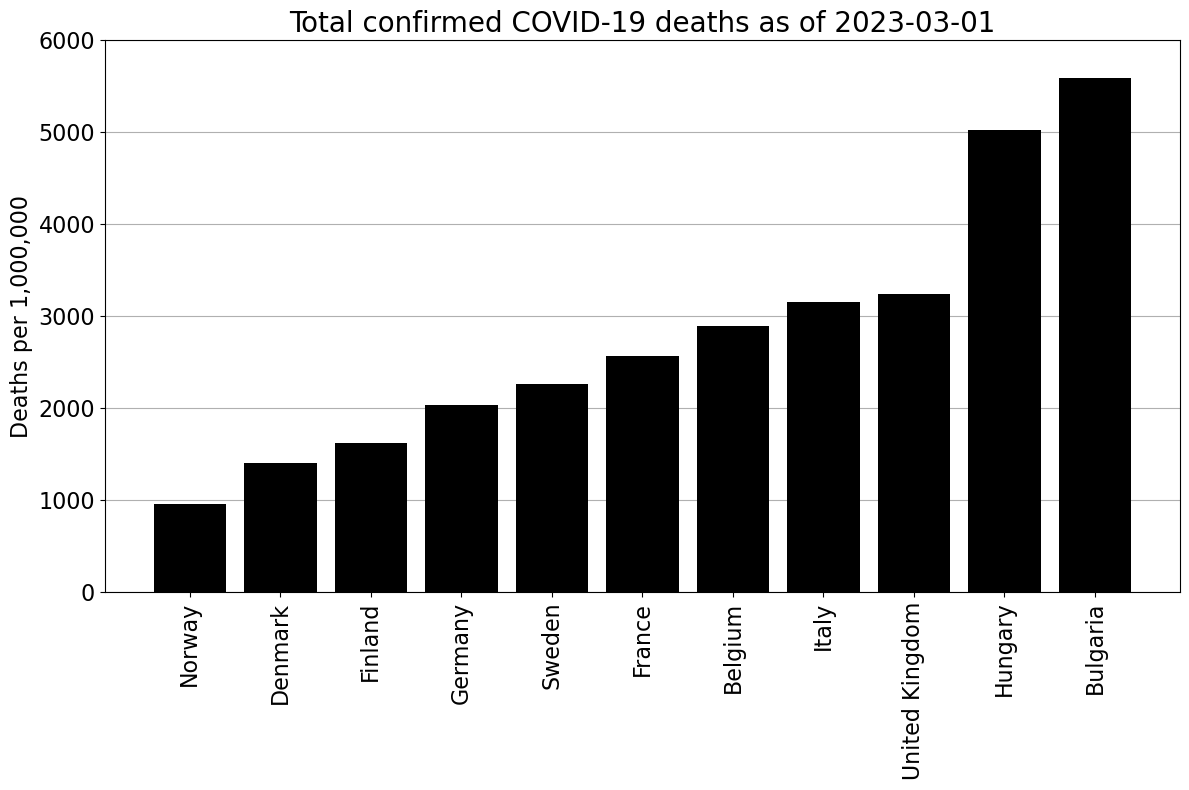

In [392]:
fig,ax = plt.subplots()
# dfOrder.plot.bar(ax=ax)
ax.bar(dfOrder.Country,dfOrder.Count,color='k')

# ax.
plt.xticks(rotation=90)

ax.set_title(f'Total confirmed COVID-19 deaths as of {d2}')

ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_ylim(0,6000)
ax.set_ylabel('Deaths per 1,000,000')
fig.tight_layout()


if saveFigures:
    fig.savefig(path_figs+'Deaths2025_Bar.png')

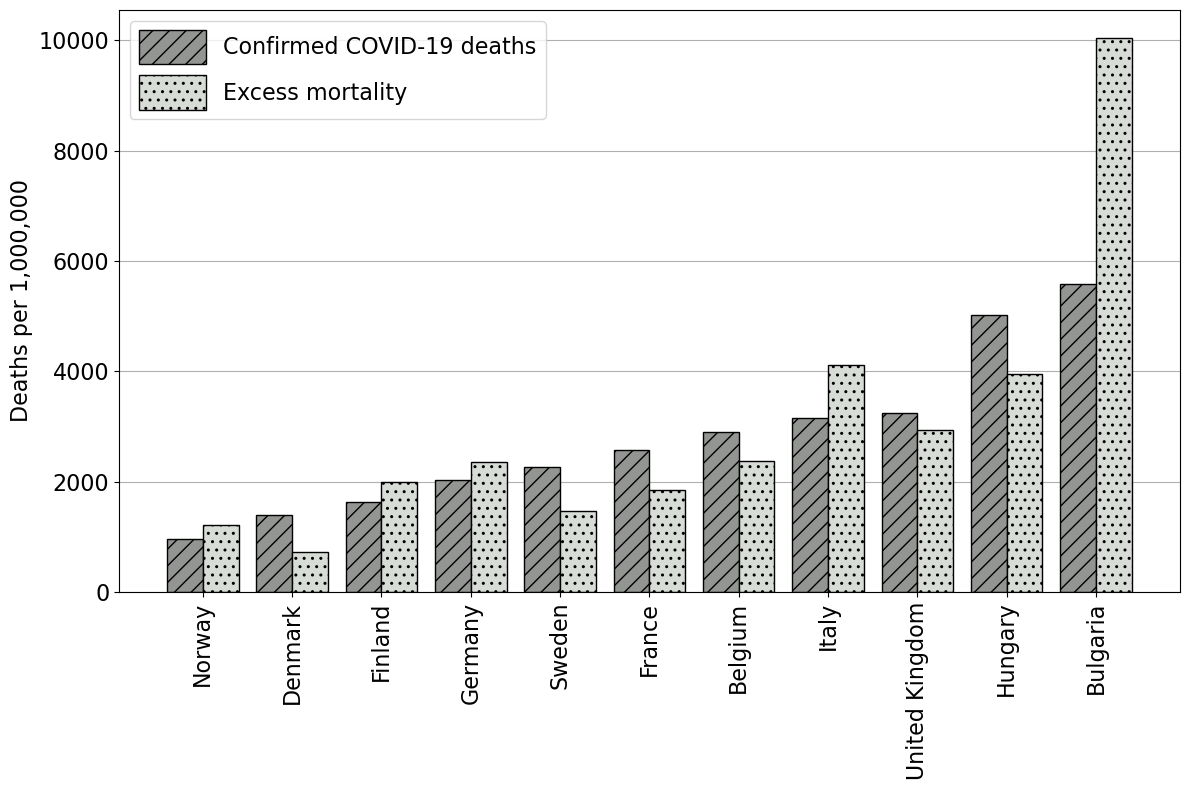

In [416]:
fig,ax = plt.subplots()
# dfOrder.plot.bar(ax=ax)
curX = np.arange(len(dfOrder))
ax.bar(curX-0.2,dfOrder.Count,width=0.4,label='Confirmed COVID-19 deaths',hatch='//',edgecolor='k',color='xkcd:gray')
ax.bar(curX+0.2,dfOrder.Excess,width=0.4,label='Excess mortality',hatch='..',edgecolor='k',color='xkcd:light gray')


ax.set_xticks(curX)
ax.set_xticklabels(dfOrder.Country)
# ax.
plt.xticks(rotation=90)



# ax.set_title(f'Total confirmed COVID-19 deaths as of {d2}')

ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_ylim(0)
ax.set_ylabel('Deaths per 1,000,000')

ax.legend(handleheight=2,handlelength=3)

fig.tight_layout()


if saveFigures:
    fig.savefig(path_figs+'Deaths2025_Bar_Excess.png')

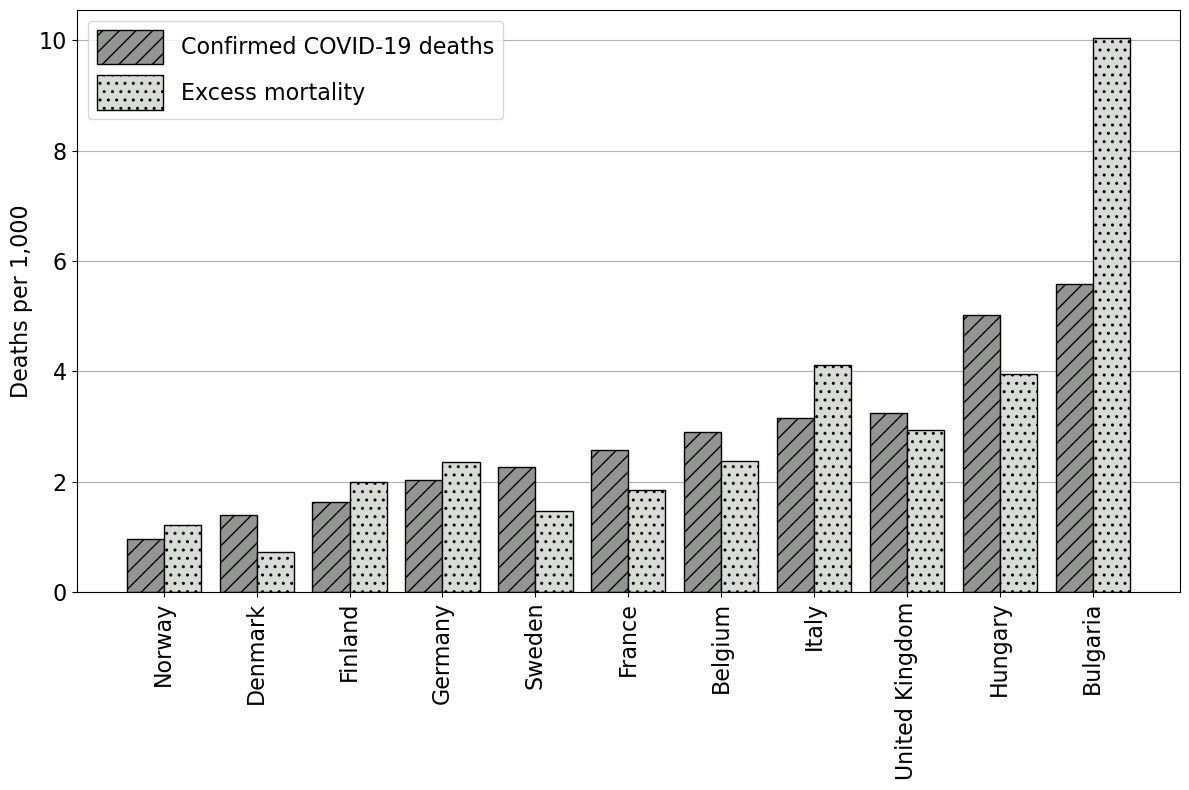

In [417]:
fig,ax = plt.subplots()
# dfOrder.plot.bar(ax=ax)
curX = np.arange(len(dfOrder))
ax.bar(curX-0.2,dfOrder.Count/1000,width=0.4,label='Confirmed COVID-19 deaths',hatch='//',edgecolor='k',color='xkcd:gray')
ax.bar(curX+0.2,dfOrder.Excess/1000,width=0.4,label='Excess mortality',hatch='..',edgecolor='k',color='xkcd:light gray')


ax.set_xticks(curX)
ax.set_xticklabels(dfOrder.Country)
# ax.
plt.xticks(rotation=90)



# ax.set_title(f'Total confirmed COVID-19 deaths as of {d2}')

ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_ylim(0)
ax.set_ylabel('Deaths per 1,000')


ax.legend(handleheight=2,handlelength=3)

fig.tight_layout()


if saveFigures:
    fig.savefig(path_figs+'Deaths2025_Bar_Excess_Thousand.png')

In [361]:
df_OWID.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't